# What sells a car?  

This is an analysis for Crankshaft List, that has hundreds of free advertisements for vehicles published on it's site every day. We need to study data collected over the last few years and determine which factors influence the price of a vehicle.

**The project goal:** 

To determine which factors influence the price of a vehicle.

## Initialization

First we will load the needed libraries and the data file, and make initial exploration of the data.

In [2]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Loading data

In [3]:
# Loading the data file into a DataFrame
data = pd.read_csv('/datasets/vehicles_us.csv')

### Exploring initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [4]:
# printing the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# printing a sample of data
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


We can see there are 8 columns with full 51525 rows, 4 columns with 40K-50K rows (missing a few K rows), and one column (is_4wd) with only half of the rows. The sample seems to show that in this column the NaN values are actually the negative answer to the "is_4wd" question. 

One column (date_posted) has inappropriate data type (we will need to change to 'datetime' type).

We will check the amount of missing values:

In [6]:
# how many missing values in each column:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In addition to 'is_4wd' column (where the missing values are probably the False), 'model_year' column has 3619 missing values, 'cylinders' has 5260, 'odometer' has 7892, and 'paint_color' has 9267 missing values.

### Conclusions and further steps


1. Two simple steps will be to change the missing values of 'is_4wd' into 'False' (after re-checking this is probably the situation), and changing 'date_posted' datatype into 'datetime'.
2. For the other 4 columns with missing values - since these columns contain real independant data, and since our project question is about **all** factors that influence the price, it seems not reliable enough to fill in these missing values with means or medians of different kinds. For maximum reliability our strategy will be to prepare a 'no_missing' filtered dataset - obviously much smaller - without the rows with missing values, but also keep the full dataset and check our findings with both datasets, in order not to lose real data of the 8 columns (including the Price) that are full with all 51525 rows.  

## Treating missing values

We will study and treat the missing values in 'is_4wd', and also check the creation of 'no_missing_data' dataset.

In [7]:
# checking which (and how many of each) values apear in 'is_4wd':  
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

It seems clear that 1.0 is the 'True' (about half of the dataset), and therfore all NaN values should be filled in with 'False'. 

In [8]:
# filling in the missing values and checking it worked: 
data['is_4wd'] = data['is_4wd'].fillna(False)
data['is_4wd'].value_counts()

False    25953
1.0      25572
Name: is_4wd, dtype: int64

'False' answer to 'is_4wd' is ok now, later we will change the 1.0 into 'True'. But first we will check the creation of a 'no_missing' data without the rows that still have missing values. 

In [9]:
# 'no_missing' data - after droping all rows that still have missing values:
no_missing_data = data.dropna()
no_missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29916 entries, 2 to 51523
Data columns (total 13 columns):
price           29916 non-null int64
model_year      29916 non-null float64
model           29916 non-null object
condition       29916 non-null object
cylinders       29916 non-null float64
fuel            29916 non-null object
odometer        29916 non-null float64
transmission    29916 non-null object
type            29916 non-null object
paint_color     29916 non-null object
is_4wd          29916 non-null object
date_posted     29916 non-null object
days_listed     29916 non-null int64
dtypes: float64(3), int64(2), object(8)
memory usage: 3.2+ MB


As we can see, this leaves only ~30K rows (only ~58% of all rows), but this is still quite a large dataset. After the following data fixes and enrichments - we will re-do this 'dropna' to improve this 'no_missing' data. 

## Fixing data types

We will make sure 'is_4wd' column is properly turned into 'bool' data type, and 'date_posted' column is turned into 'datetime' data type.  

In [10]:
# changing '1.0' in 'is_4wd' column into 'True', which means that the datatype is changed into Bool: 
data['is_4wd'] = data['is_4wd'].replace(1.0, True)
data['is_4wd'].value_counts()

False    25953
True     25572
Name: is_4wd, dtype: int64

In [11]:
# changing 'date_posted' datatype into 'datetime', and checking a sample (below we will check info): 
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


In [12]:
# checking the datatypes were changed correctly:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


Datatypes were changed correctly: 'is_4wd' column is now 'bool' and 'date_posted' column is now ''datetime'. 

## Enriching data

We will make the following enrichments: 
first we will add the following columns:
1. 'age_posted' - the vehicle's age when the add was posted
2. 'yearly_mile' - the vehicle's average mileage per year 
3. And change the 'condition' column values into numeric values, for easier analysis. 

In [13]:
# Adding the vehicle's age when the ad was placed, and checking a sample: 
data['age_posted'] = data['date_posted'].dt.year - data['model_year']
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,7.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2.0


In [14]:
# Add the vehicle's average mileage per year, rounded, and check a sample: 
data['yearly_mile'] = (data['odometer'] / data['age_posted']).round()
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_posted,yearly_mile
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,7.0,20714.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,NaN,NaN
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6.0,18333.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9,16.0,NaN
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2.0,40452.0


In [15]:
# checking the values of the 'condition' column: 
data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [16]:
# replacing the condition values with numeric values, and checking:  
for k,v in [('new', 5), ('like new', 4), ('excellent', 3), ('good', 2), ('fair', 1), ('salvage', 0)]:
    data['condition'] = data['condition'].replace(k, v)
data['condition'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Checking clean data

Before going into the analysis - we will look at the general info and sample of the full data, and also re-create the 'no_missing_data', after the fixes and the enrichments, and see it's general info and sample. 

In [17]:
# the general/summary information about the full clean DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null int64
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
age_posted      47906 non-null float64
yearly_mile     40561 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 5.6+ MB


Naturally - the new 'age_posted' column is limited by missing 'model_year' values, and the new 'yearly_mile' column is limited by two columns: both 'age_posted' and 'odometer' missing values.  

In [18]:
# print a sample of data
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_posted,yearly_mile
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,7.0,20714.0
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,NaN,NaN
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6.0,18333.0
3,1500,2003.0,ford f-150,1,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9,16.0,NaN
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2.0,40452.0


Now we shall re-create the smaller 'no_missing' data, and see it's clean info and sample: 

In [19]:
# 'no_missing' data - after all fixes, and after droping all rows that have missing values:
no_missing_data = data.dropna()
no_missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29915 entries, 2 to 51523
Data columns (total 15 columns):
price           29915 non-null int64
model_year      29915 non-null float64
model           29915 non-null object
condition       29915 non-null int64
cylinders       29915 non-null float64
fuel            29915 non-null object
odometer        29915 non-null float64
transmission    29915 non-null object
type            29915 non-null object
paint_color     29915 non-null object
is_4wd          29915 non-null bool
date_posted     29915 non-null datetime64[ns]
days_listed     29915 non-null int64
age_posted      29915 non-null float64
yearly_mile     29915 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 3.5+ MB


In [20]:
# a sample of the new 'no_missing_data':
no_missing_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_posted,yearly_mile
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6.0,18333.0
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2.0,40452.0
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,4.0,14488.0
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3.0,26404.0
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,6.0,18246.0


After cleaning the full data, and also the smaller 'no_missig_data', we will move to checking the issue of outliers in the core parameters.

## Studying core parameters

The core parameters are: 
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

First we will look at the distribution of these parameters using histograms.

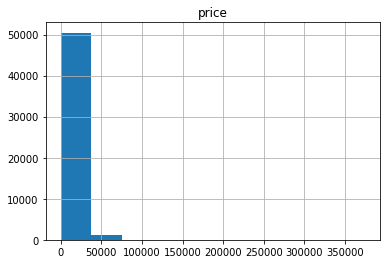

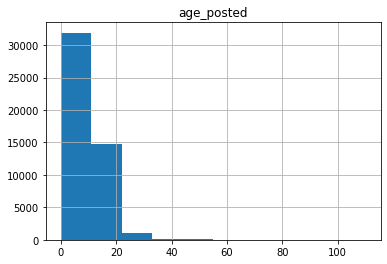

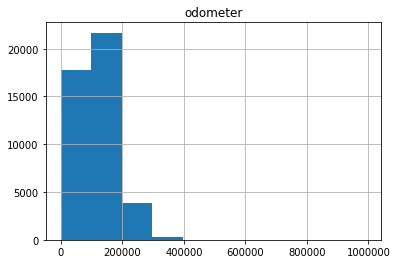

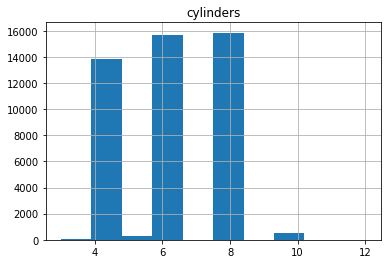

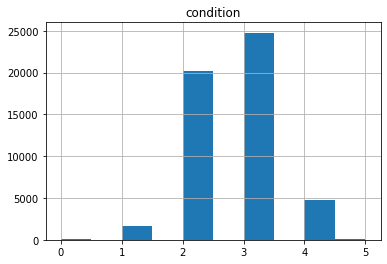

In [21]:
# histograms (10 bins) for the 5 core parameters: 
core = ['price','age_posted', 'odometer', 'cylinders', 'condition']
for column in core:
    data[column].hist()
    plt.title(column)
    plt.show()

We can clearly see that 3 columns - 'price', 'age_posted', and 'odometer' - have outliers that impact the histograms, while 'cylenders' and 'condition' have far more balanced histograms. 

Now let's see if the 'no_missing_data' shows the same picture: 

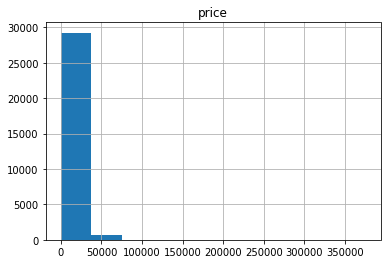

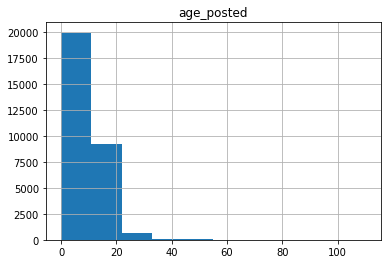

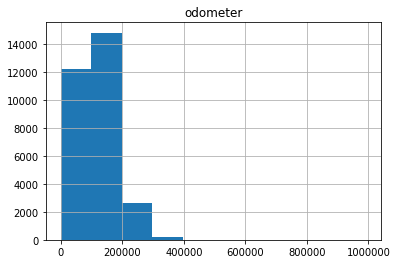

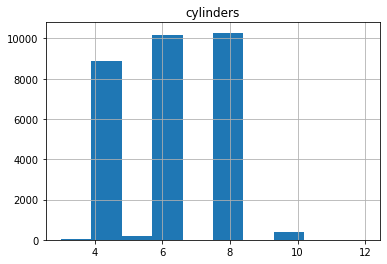

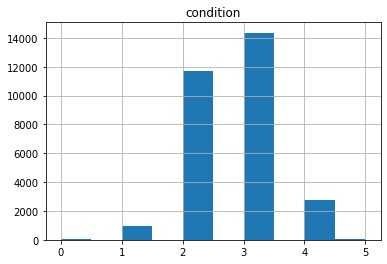

In [22]:
# histograms (10 bins) for the 5 core parameters, with the 'no_missing_data' dataset: 
core = ['price','age_posted', 'odometer', 'cylinders', 'condition']
for column in core:
    no_missing_data[column].hist()
    plt.title(column)
    plt.show()

Yes, it is the same picture in the 'no_missing_data' dataset.

Before we treat the outliers of the 3 upper parameters - let's clarify the study results of the 2 lower ones:

**Cylinders**: Almost all the cars in the dataset have 4, 6 or 8 cylinders. ~1% have 10 cylinders and even less have 5 cylinders.

**Condition**: ~90% of all cars are in condition 2 or 3 (good or excellent). ~10% are in condition 4 (like new), ans less than 5% are in condition 1 (fair)


Next, we shall treat the outliers of these 3 parameters. 

## Studying and treating outliers

Following the results above, we will first look at boxplots, and then determine limits for droping outliers. 

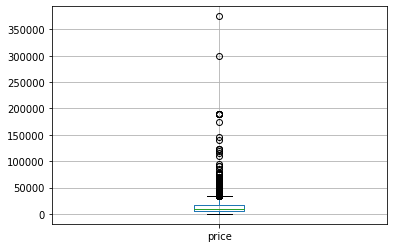

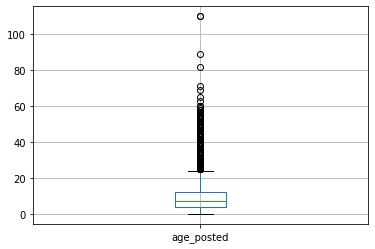

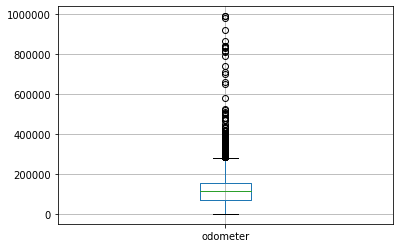

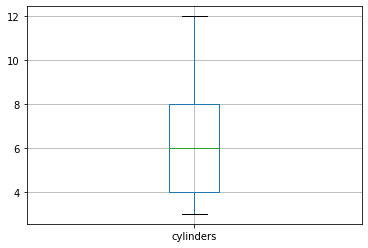

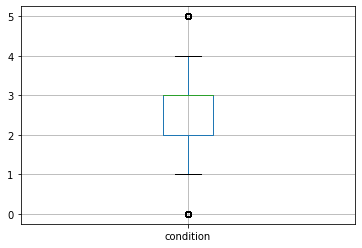

In [23]:
# boxplots for the 5 core parameters:  
for column in core:
    data.boxplot(column)
    plt.show()

We can clearly see again that the outliers are in the 3 upper columns, and that they are high outliers (but not low ones). We will choose the IQR method for determinning the upper limits and creating data without outliers in these 3 core columns. 

In [24]:
# Creating filtered data without outliers in the 3 core columns, using IQR method for the upper limits: 
outliers_columns = ['price', 'age_posted', 'odometer']
data_no_outliers = data
for column in outliers_columns:
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    data_no_outliers[column]=data_no_outliers[column][~(data_no_outliers[column]>(Q3+1.5*IQR))]
    
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
price           49879 non-null float64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null int64
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43146 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
age_posted      47169 non-null float64
yearly_mile     40561 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2), object(5)
memory usage: 5.6+ MB


Again, we shall also create a smaller 'no_outliers_no_missing_data' dataset. This 'cleaner but smaller' dataset now will also fully exclude all rows were outliers were deleted from the 3 core columns.    

In [25]:
# Create 'no_outliers_no_missing_data' and see it's general info:
no_outliers_no_missing_data = data_no_outliers.dropna()
no_outliers_no_missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28197 entries, 2 to 51523
Data columns (total 15 columns):
price           28197 non-null float64
model_year      28197 non-null float64
model           28197 non-null object
condition       28197 non-null int64
cylinders       28197 non-null float64
fuel            28197 non-null object
odometer        28197 non-null float64
transmission    28197 non-null object
type            28197 non-null object
paint_color     28197 non-null object
is_4wd          28197 non-null bool
date_posted     28197 non-null datetime64[ns]
days_listed     28197 non-null int64
age_posted      28197 non-null float64
yearly_mile     28197 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2), object(5)
memory usage: 3.3+ MB


## Studying core parameters without outliers

Using the filtered data, we will make new plots, and compare with the earlier ones (that included outliers). 

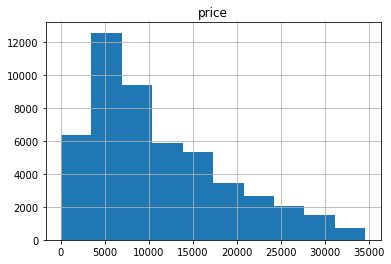

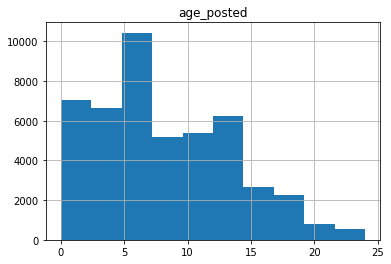

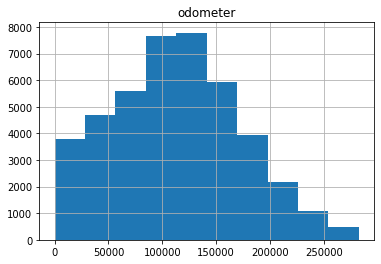

In [26]:
# histograms (10 bins) for the 3 core (outliers) parameters, without the outliers: 
for column in outliers_columns:
    data_no_outliers[column].hist()
    plt.title(column)
    plt.show()

We can clearly see now the distributions of these parameters are more reasonable, and still it is noteworthy that 'Price' has a right skewed distribution (and so does 'age_posted', but to a lesser extent). Let's look at the relevant boxplots.  

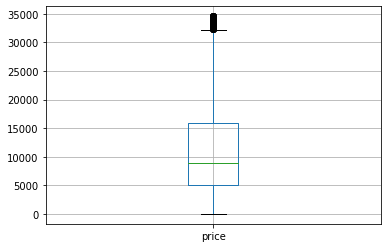

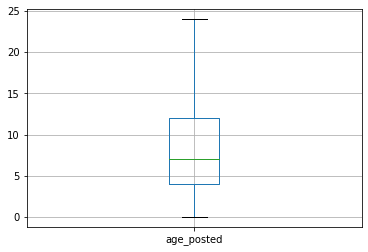

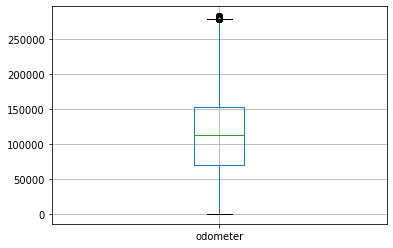

In [27]:
# boxplots of the 3 core (outliers) parameters, without the outliers: 
for column in outliers_columns:
    data_no_outliers.boxplot(column)
    plt.show()

Outliers are out. Now let's see the new histograms for the smaller 'no_outliers_no_missing_data' dataset.

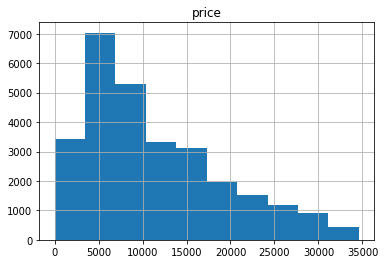

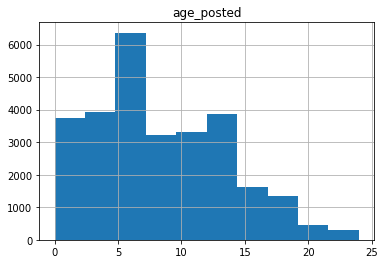

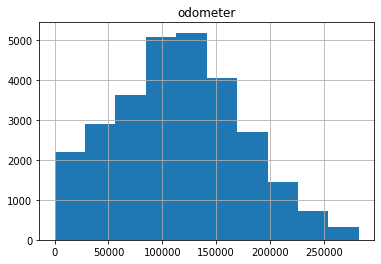

In [28]:
# Histograms (10bins) for the 3 core (outliers) parameters, without the outliers,
# of the smaller 'no_outliers_no_missing_data' dataset:  
for column in outliers_columns:
    no_outliers_no_missing_data[column].hist()
    plt.title(column)
    plt.show()

As before - we see the same picture in the smaller dataset as in the fuller one.

**Conclusions for initial study of core parameters**

1. After detecting and droping outliers from 3 parameters (price, age and mileage) - the distributions of these parameters are reasonable, and still it is noteworthy that 'Price' has a right skewed distribution (and so does 'age_posted', but to a lesser extent).
2. Cylinders: Almost all the cars in the dataset have 4, 6 or 8 cylinders. ~1% have 10 cylinders and even less have 5 cylinders.
3. Condition: ~90% of all cars are in condition 2 or 3 (good or excellent). ~10% are in condition 4 (like new), ans less than 5% are in condition 1 (fair)
4. We will continue with 2 datasets:1. (main) data_no_outliers. 2. (smaller) no_outliers_no_missing_data. 

## Ads lifetime

Next, we will study how many days advertisements were displayed (`days_listed`). We will calculate the mean and median and describe the typical lifetime of an add. We will try to determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [29]:
# Basic statistics of 'days_listed': 
data_no_outliers['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

The IQR of the ads lifetime is between 19 and 53 days, the mean is ~40 days, and the median is 33 days. Let's look at a histogram to see the distribution:  

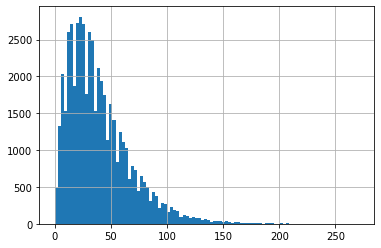

In [30]:
# 100 bins histogram of 'days_listed': 
data_no_outliers['days_listed'].hist(bins=100)

We can see that only a very small portion of the ads are posted for more than 100 days, and on the other hand there are quite a few hundreds of ads that are posted for only a few days or less.  

Next, we will try to determine when ads were removed very fast.

In [31]:
# The ads that were removed at the same day of publication: 
data_no_outliers.query('days_listed <1')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_posted,yearly_mile
1247,14995.0,2008.0,chevrolet silverado 1500,3,8.0,gas,93300.0,automatic,truck,grey,True,2018-05-15,0,10.0,9330.0
1711,NaN,2019.0,chevrolet silverado 2500hd,3,8.0,diesel,NaN,automatic,truck,white,True,2019-01-13,0,0.0,NaN
1983,14000.0,1999.0,ford f250,3,8.0,diesel,137500.0,automatic,truck,red,True,2018-09-27,0,19.0,7237.0
2883,4000.0,2004.0,ram 1500,3,8.0,gas,250000.0,automatic,truck,brown,True,2018-08-13,0,14.0,17857.0
3965,16750.0,1985.0,chevrolet corvette,4,8.0,gas,24540.0,automatic,hatchback,white,False,2018-10-14,0,NaN,744.0
4567,5000.0,2007.0,toyota corolla,2,4.0,gas,223000.0,manual,sedan,silver,False,2018-07-11,0,11.0,20273.0
4901,12500.0,2001.0,ram 1500,2,8.0,gas,99892.0,automatic,truck,black,True,2018-05-11,0,17.0,5876.0
6114,500.0,2003.0,dodge dakota,1,6.0,gas,215457.0,automatic,pickup,NaN,False,2018-10-31,0,15.0,14364.0
6548,4800.0,2007.0,honda odyssey,2,6.0,gas,152400.0,automatic,mini-van,brown,False,2018-09-25,0,11.0,13855.0
7036,5900.0,2007.0,jeep grand cherokee laredo,3,6.0,gas,NaN,automatic,SUV,grey,True,2018-07-21,0,11.0,NaN


It is hard to notice any clear pattern about this interesting group of ads, so we will try to see if scatterplots (for the numerical parameters) will be helpful with determinning when ads were removed very fast. Now we will include also the ads that were removed 1 day after publication: 

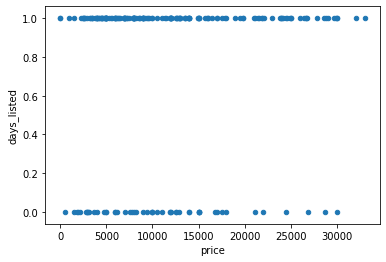

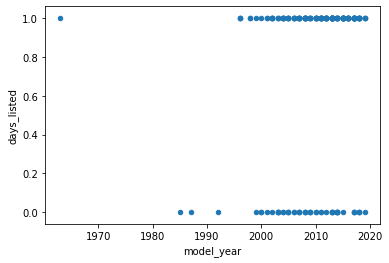

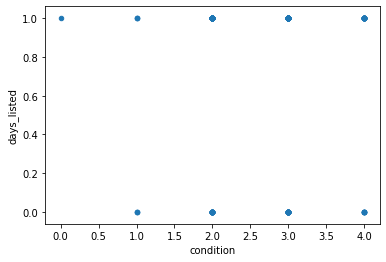

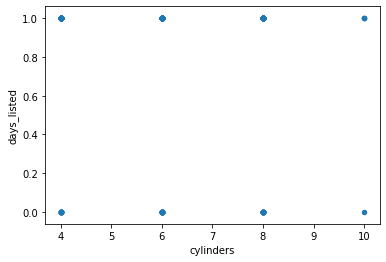

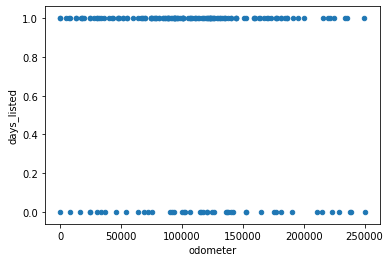

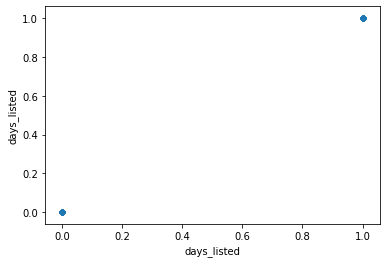

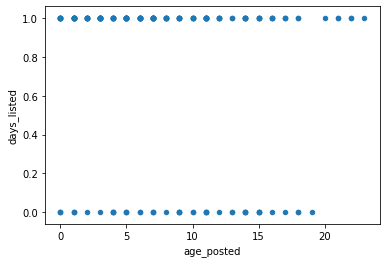

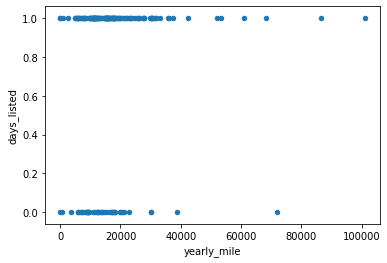

In [32]:
# scatterplots of ads that were removed up to 1 day after publication:  
short_time = data_no_outliers.query('days_listed <=1')
for column in short_time.columns:
    if (short_time[column].dtype == int) or (short_time[column].dtype == float):
        short_time.plot(x=column, y='days_listed', kind='scatter')

Most of the tendencies that can be seen above are actually tendencies of the whole dataset... still we can say that ads that were removed very fast usually had:
- Price up to 15000 (0 days posted)
- Model year after 2000
- Yearly mileage up to 20000 (0 days posted) 

Next we will try to see when ads were placed for a very long time. We will choose ads that were placed for more than 200 days:

In [33]:
# The ads that were posted for more than 200 days: 
data_no_outliers.query('days_listed > 200')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age_posted,yearly_mile
51,3800.0,2012.0,ford focus,2,4.0,gas,130323.0,automatic,sedan,black,False,2018-11-29,261,6.0,21720.0
2224,5995.0,2004.0,ford f-250,2,8.0,gas,103000.0,automatic,truck,red,True,2019-01-24,263,15.0,6867.0
3202,5995.0,2009.0,toyota prius,3,4.0,gas,130000.0,automatic,hatchback,blue,False,2018-10-17,244,9.0,14444.0
3243,6900.0,NaN,honda accord,2,NaN,gas,80000.0,automatic,sedan,silver,False,2018-07-21,228,NaN,NaN
4360,5200.0,2011.0,chevrolet impala,4,6.0,gas,122000.0,automatic,sedan,NaN,False,2018-05-24,271,7.0,17429.0
5640,6900.0,2011.0,kia sorento,2,NaN,gas,NaN,automatic,wagon,grey,True,2018-07-12,201,7.0,NaN
7875,8980.0,NaN,nissan altima,3,6.0,gas,101611.0,automatic,coupe,blue,False,2019-02-02,256,NaN,NaN
9630,8995.0,2008.0,toyota highlander,4,6.0,gas,156000.0,automatic,SUV,NaN,True,2018-10-03,207,10.0,15600.0
10650,17700.0,2015.0,nissan frontier crew cab sv,2,6.0,gas,67071.0,other,pickup,black,False,2019-01-20,206,4.0,16768.0
11698,21995.0,2019.0,chevrolet impala,4,6.0,gas,NaN,automatic,sedan,black,False,2019-02-24,236,0.0,NaN


Again, it is hard to notice clear tendencies, so once again we will try scatterplots: 

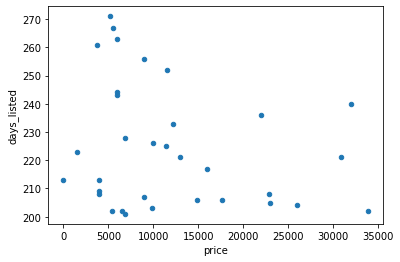

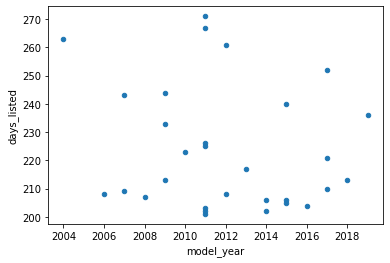

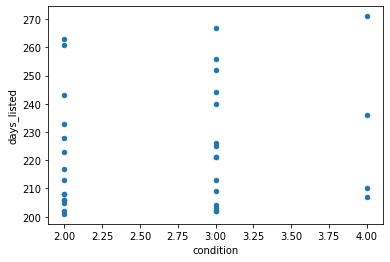

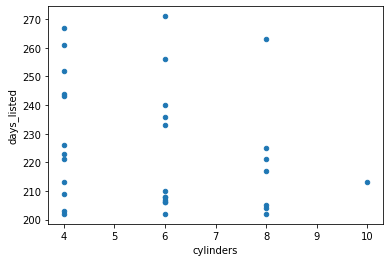

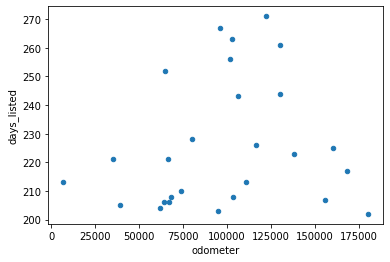

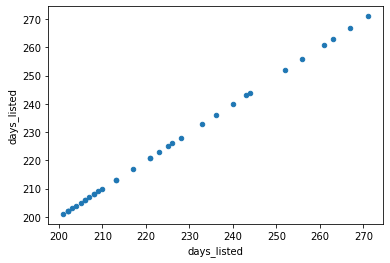

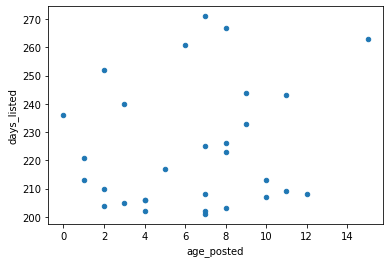

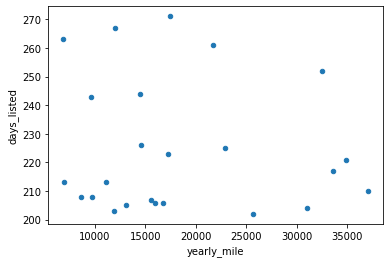

In [34]:
# Scatterplots of ads that were posted for more than 200 days: 
long_time = data.query('days_listed > 200')
for column in long_time.columns:
    if (long_time[column].dtype == int) or (long_time[column].dtype == float):
        long_time.plot(x=column, y='days_listed', kind='scatter')

It is hard to see above any clear tendency that answers when ads were posted for a very long time, it seems these ads have a wide variety of values in their parameters. 

We will now check for the full range of 'days_listed' if there are clear parameters that correlate with the ad lifetime. Due to the large number of ads now - we will use lower graphic density to better see density of cases.  

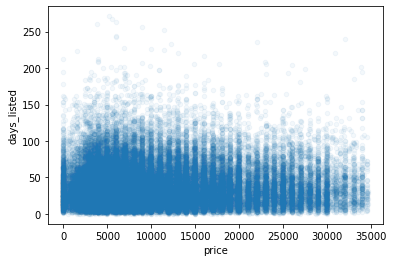

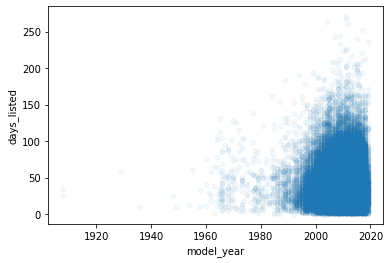

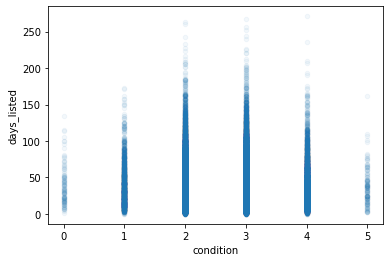

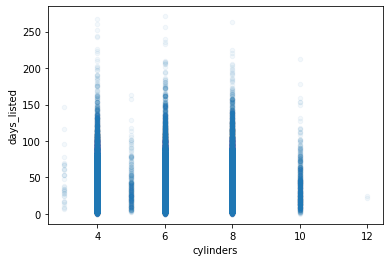

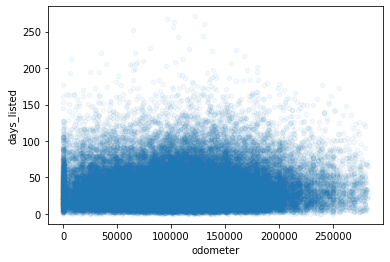

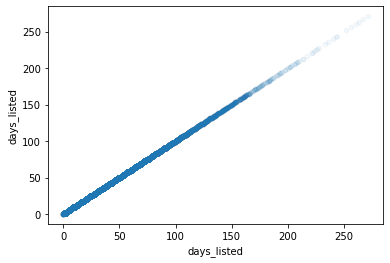

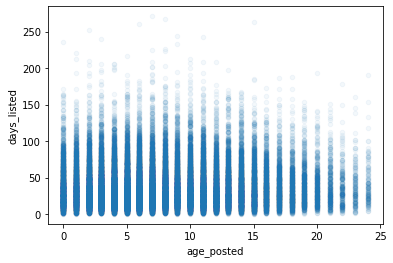

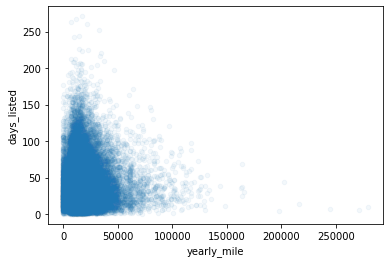

In [35]:
# Scatterplots of adds of all lifetime lengths: 
for column in data_no_outliers.columns:
    if (data_no_outliers[column].dtype == int) or (data_no_outliers[column].dtype == float):
        data_no_outliers.plot(x=column, y='days_listed', kind='scatter', alpha=0.05)

Again, it is hard to see any clear correlations between ad liftime and another parameter of this ad. The one parameter that might have some correlation hidden looks like 'model_year' - so we will try the 'corr' method to check this numerically:

In [36]:
# linear correlation between 'days_listed' and 'model_year': 
data_no_outliers['days_listed'].corr(data_no_outliers['model_year'])

-0.005703312883853099

No, no linear correlation. 

Now we shall check the dependance of 'days_listed' upon the numeric columns - for the smaller cleaner dataset ('no_outliers_no_missing_data'):

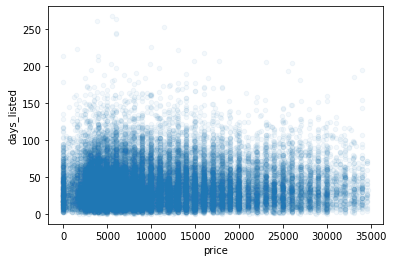

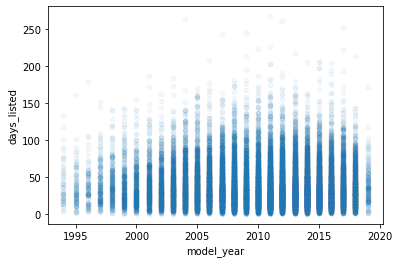

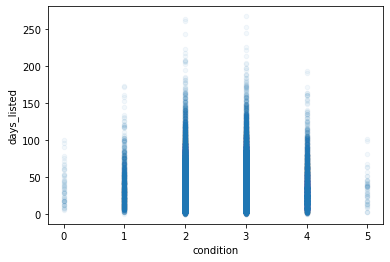

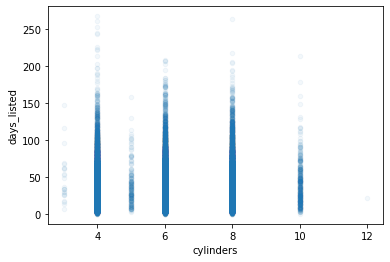

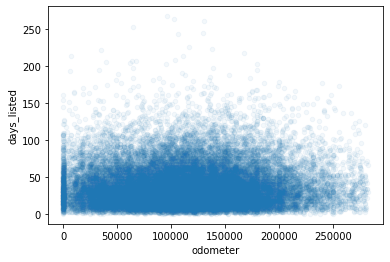

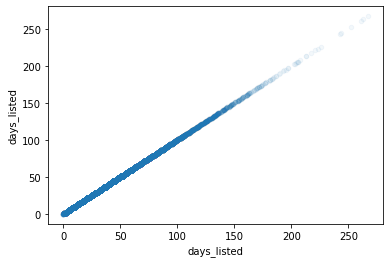

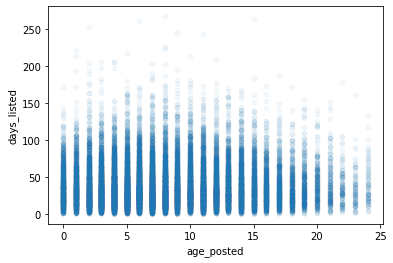

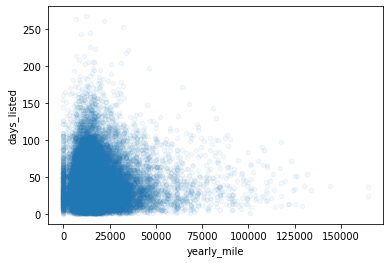

In [37]:
# Scatterplots for 'days_listed' vs. other numeric columns, for the small dataset: 
for column in no_outliers_no_missing_data.columns:
    if (no_outliers_no_missing_data[column].dtype == int) or (no_outliers_no_missing_data[column].dtype == float):
        no_outliers_no_missing_data.plot(x=column, y='days_listed', kind='scatter', alpha=0.05)

Again - hard to see any clear relation, beyond tendencies of the whole dataset.

We will check now the statistics of ads lifetime in the smaller dataset: 

In [38]:
# Basic statistics of 'days_listed' in the smaller dataset: 
no_outliers_no_missing_data['days_listed'].describe()

count    28197.000000
mean        39.602759
std         28.106986
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        267.000000
Name: days_listed, dtype: float64

The distribution and typical ad liftime of the smaller dataset is very similar to the fuller dataset - IQR between 19 and 53 days, mean ~40 days, median 33 days. 

## Average price per each type of vehicle

We finally start checking which factors influence the price. 

The first parameter we will check will be the **type of vehicle** - since this is actually the main identifier of the vehicle, before any other parameter. We will analyze the number of ads and the average price for each type of vehicle. We will also plot a graph showing the dependence of the number of ads on the vehicle type.

In [39]:
# a table showing - for each type of vehicle - the number of ads, mean and median prices: 
type_table = data_no_outliers.pivot_table(index='type', values='price',
                                          aggfunc=('count', 'mean', 'median'))
type_table.sort_values(by='count', ascending=False, inplace=True)
type_table

,count,mean,median
type,,,
sedan,12147,6942.349551,5995.0
SUV,12104,10359.897968,8500.0
truck,11550,14820.840606,14000.0
pickup,6622,14609.742072,13500.0
coupe,2226,13269.010782,11999.0
wagon,1531,8880.496408,7896.0
mini-van,1157,8004.687986,6495.0
hatchback,1046,6841.620459,5977.5
van,591,8743.340102,7495.0


The typical price is significantly different for different types of vehicles. For the 4 types that have the highest numbers of ads, the median prices are:
- sedan:  5995 
- SUV:    8500
- truck: 14000
- pickup:13500

Now we shall look at the number of ads per each vehicle type:



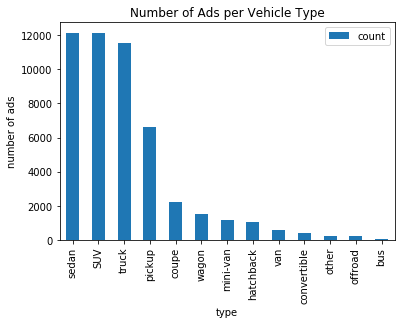

In [40]:
# a graph showing the dependence of the number of ads on the vehicle type
type_table.plot(kind='bar', y='count')
plt.title('Number of Ads per Vehicle Type')
plt.ylabel('number of ads')
plt.show()

As we can see - the 4 types - sedan, SUV, truck and pickup - make together a big majority of all ads. Numerically speaking - these 4 types make together 85% of all ads (that had a specified vehicle type and a price, excluding outliers. 42423 out of a total of 49879). 

Let's see how different the picture is with the smaller dataset:   

In [41]:
# a table showing - for each type of vehicle in the smaller dataset - the number of ads, mean and median prices 
type_table_2 = no_outliers_no_missing_data.pivot_table(index='type', values='price',
                                          aggfunc=('count', 'mean', 'median'))
type_table_2.sort_values(by='count', ascending=False, inplace=True)
type_table_2

,count,mean,median
type,,,
sedan,6938,6996.596858,5995.0
SUV,6904,10533.567787,8900.0
truck,6595,14974.535861,14500.0
pickup,3625,15126.983172,14000.0
coupe,1210,13116.437190,11995.0
wagon,884,8832.369910,7597.5
mini-van,668,8078.091317,6500.0
hatchback,562,6621.444840,5895.0
van,327,9154.596330,7995.0


Very similar to the fuller dataset, here too the typical price is significantly different for different types of vehicles. For the 4 types that have the highest numbers of ads, the median prices are:

- sedan: 5995
- SUV: 8900
- truck: 14500
- pickup:14000

Similar to the median prices of these types in the full dataset.

Now we shall look at the number of ads per each vehicle type, in the smaller dataset:

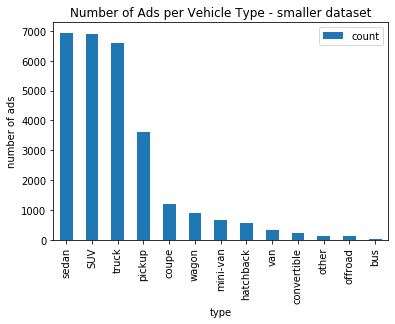

In [42]:
# a graph showing the dependence of the number of ads on the vehicle type, in the smaller dataset:
type_table_2.plot(kind='bar', y='count')
plt.title('Number of Ads per Vehicle Type - smaller dataset')
plt.ylabel('number of ads')
plt.show()

A very similar picture to the one we saw above in the fuller dataset:

As we can see - the 4 types - sedan, SUV, truck and pickup - make here too together a big majority of all ads. Numerically speaking - these 4 types make here too together ~85% of all ads (that had a specified vehicle type and a price, excluding outliers. 24062 out of a total of 28197).

Therefore - we will continue checking other factors that impact price, under each of these 4 vehicle types. 

## Additional Price factors

We will search for additional factors that impact the price most. our method will be to take each of the popular types we detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), we will plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, we will note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis. We will make use of correlation matrix and correlation plots. 

### Categorical variables (transmission and color)

We will first check how many ads we have for each value of 'tramsmission' and 'paint_color', for each of the 4 most popular vehicle types (to make sure we don't base any conclusions on less than 50 ads).

In [43]:
# checking how many ads we have for each 'transmission' value (for each vehicle type):
pop_types = ['sedan', 'SUV', 'truck', 'pickup']
data_no_outliers_4types = data_no_outliers.query('type in @pop_types')
transmission_table = data_no_outliers_4types.pivot_table(index='type', columns='transmission', values='price',
                                                  aggfunc='count')
transmission_table

transmission,automatic,manual,other
type,,,
SUV,11443,502,159
pickup,5658,348,616
sedan,11416,599,132
truck,10923,434,193


Ok here, all have enough cases in order to be valid for analysis. We will now look at paint_color:

In [44]:
# checking how many ads we have for each 'paint_color' value (for each vehicle type):
color_table = data_no_outliers_4types.pivot_table(index='type', columns='paint_color', values='price',
                                                  aggfunc='count')
color_table

paint_color,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
type,,,,,,,,,,,,
SUV,2129,1036,366,305,434,1156,81,39,890,1546,1899,47
pickup,886,499,176,43,197,530,28,10,626,640,1708,15
sedan,1768,1231,259,302,209,1622,9,26,945,2056,1509,23
truck,1439,852,246,307,273,872,47,16,1007,958,3464,66


Here we do have some cases of less than 50 ads - we will make sure not to draw conclusions from them. 

Now we are ready to look at boxplots for these categorical variables - for each vehicle type - to check their potential impact on price (for this we will first create data slices for each vehicle type).

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


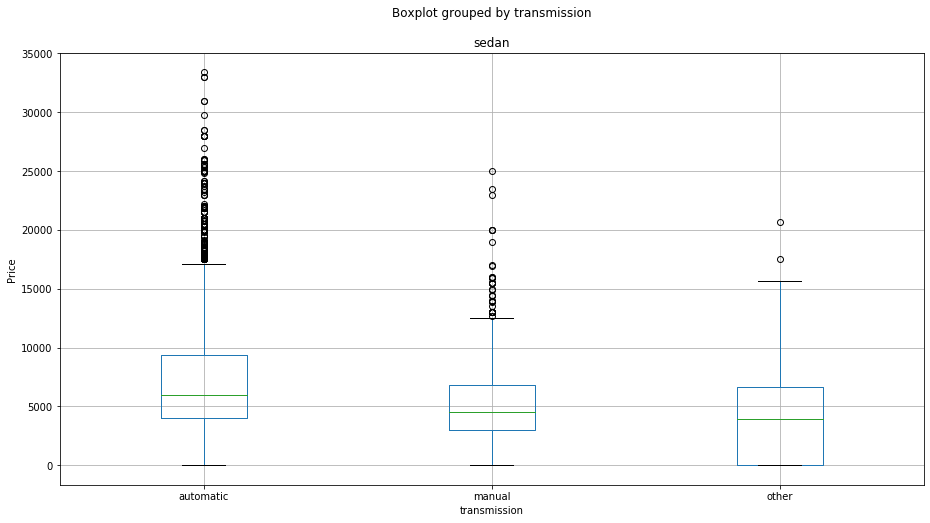

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


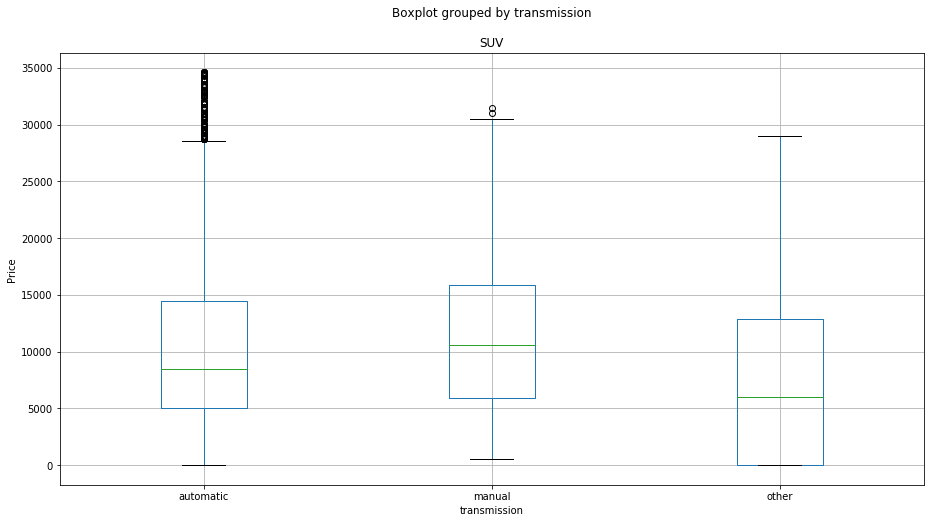

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


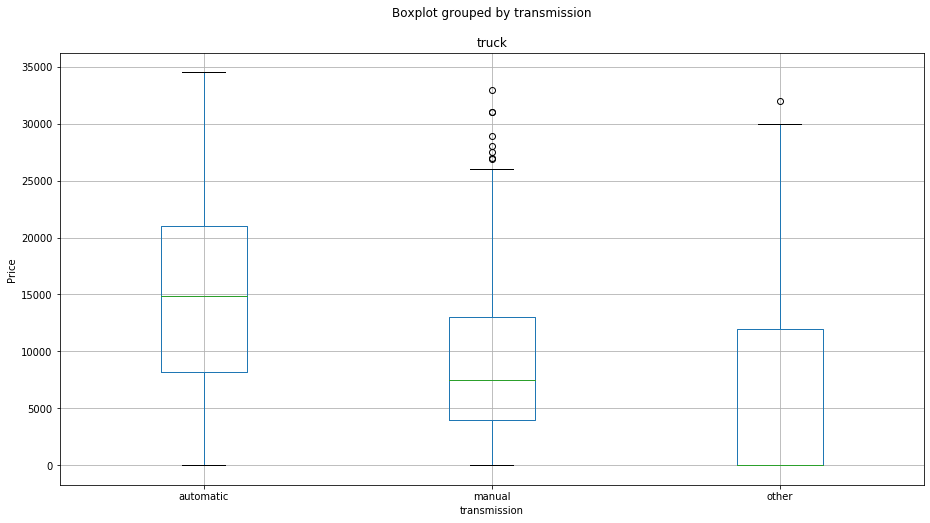

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


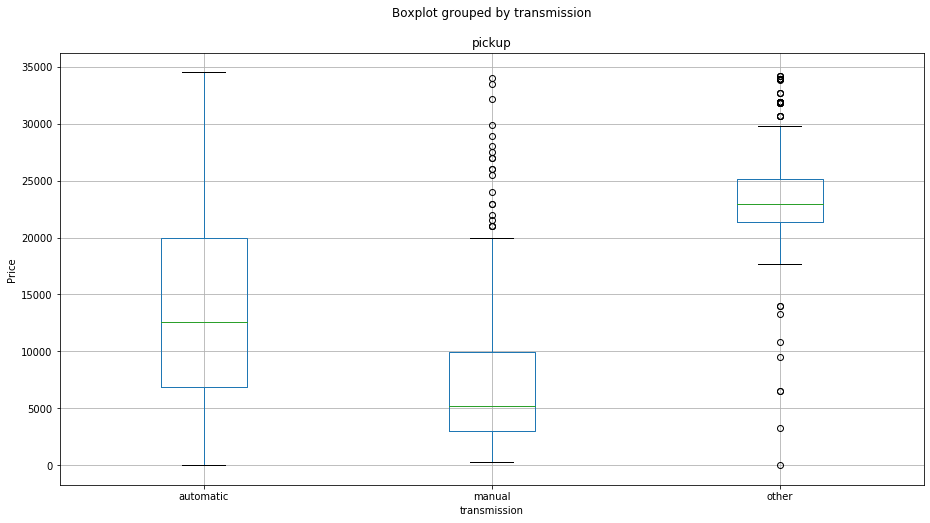

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


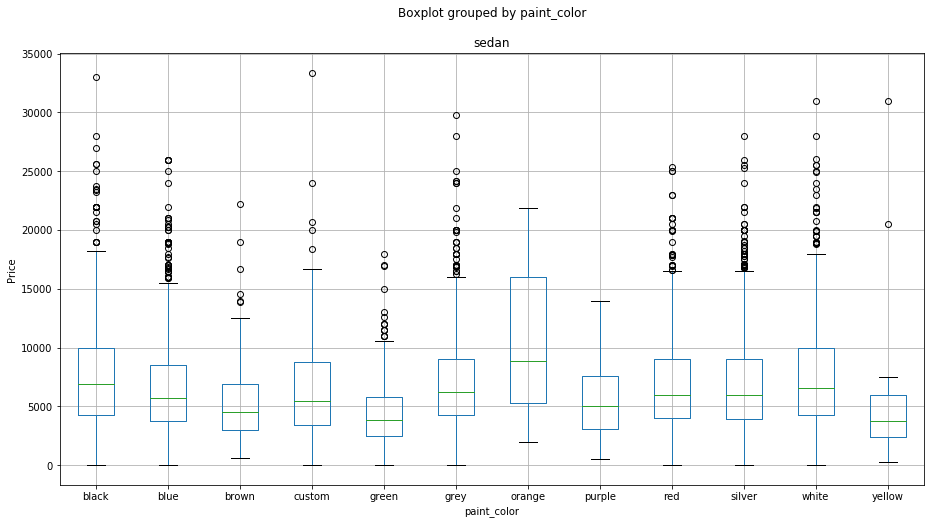

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


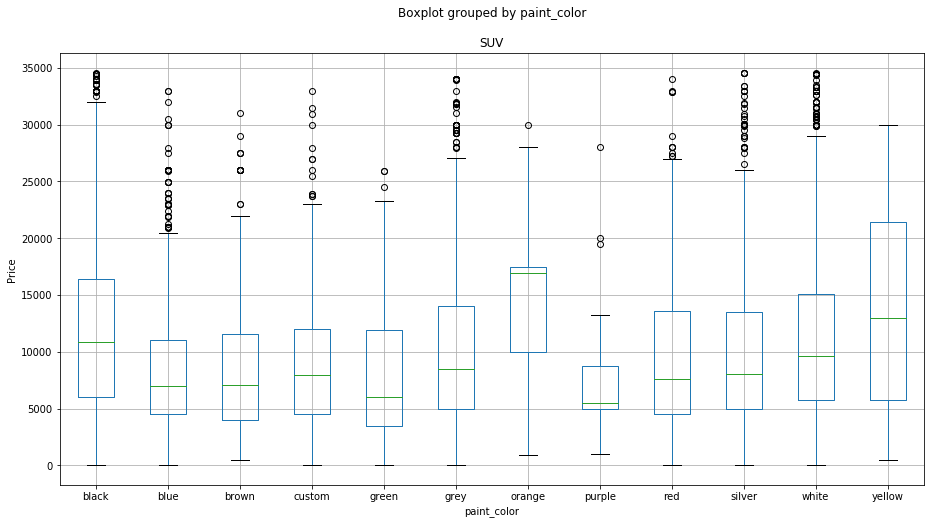

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


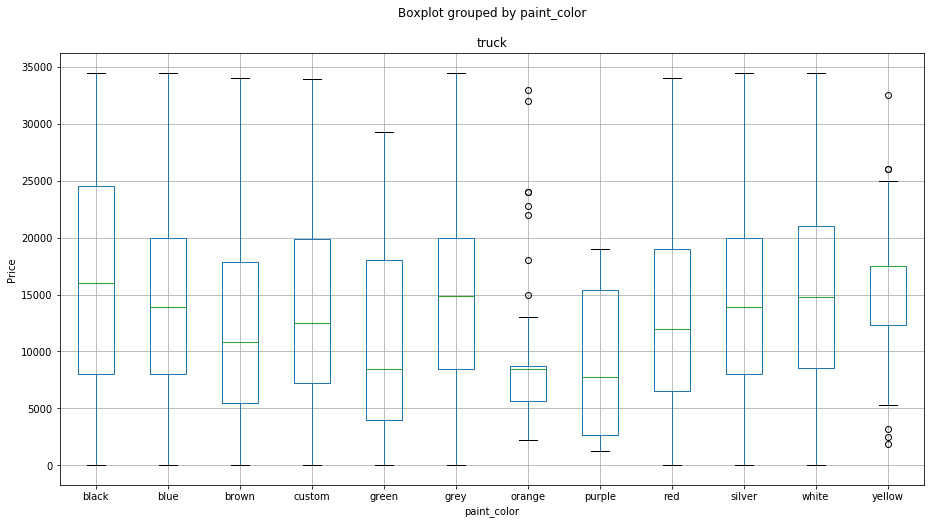

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


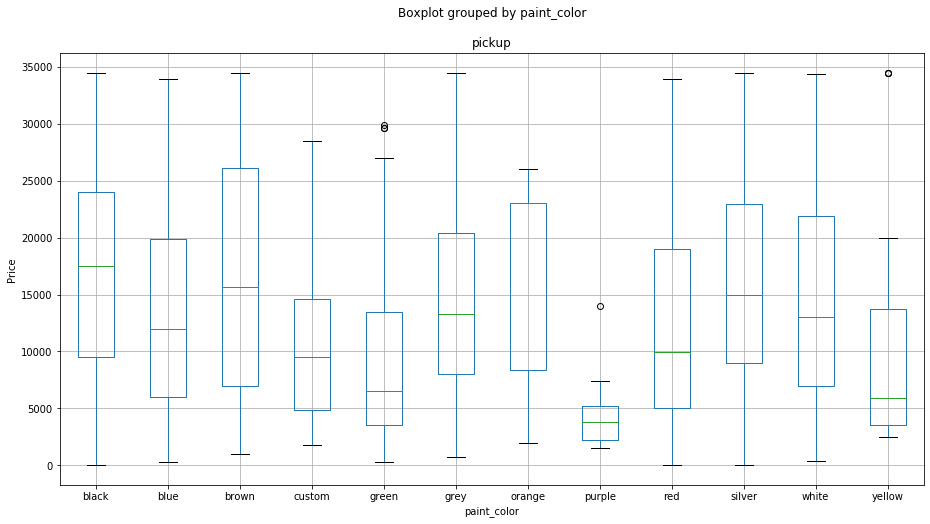

In [45]:
# boxplots for transmission and color, for each of the 4 main vehicle types: 
categ_var = ['transmission', 'paint_color']
for v in categ_var:
    for t in pop_types:
        data_no_outliers.query('type == @t').boxplot('price', by=v, figsize=(15, 8))
        plt.title(t)
        plt.ylabel('Price')
        plt.show()

We can note impact on price in the following cases:

**Transmission** matters especially when it comes to trucks and pickups (but far less for sedan or SUV):
- For trucks: manual transmission's median price is only half(!) of the median price of automatic
- For pickups: manual transmission's median price is only ~40%(!) of the median price of automatic ('other' value for pickup transmission is much more expensive, but it is unclear what it uncludes). 

**Color** matters:
- For sedans: black, white, silver and grey are all somewhat more expensive, green and brown show the lower prices, and blue is in between.
- For SUVs: orange leads with a much higher price (very small group, but still 81 ads), and of the large groups black and following white show the higher prices, while blue, green, red, silver and grey show somewhat lower prices.
- For trucks: black, and then grey and white show the higher prices while green shows the lowest prices.
- For pickups: black leads higher prices, followed by brown and silver. White is a bit lower and green shows again lowest prices.

We will now check these observations for the smaller dataset as well (again, first checking numbers of ads to make sure we dont draw conclusions from less than 50 ads).

In [46]:
# checking how many ads we have for each 'transmission' value (for each vehicle type, small dataset):
no_outliers_no_missing_data_4types = no_outliers_no_missing_data.query('type in @pop_types')
transmission_table2 = no_outliers_no_missing_data_4types.pivot_table(index='type', 
                            columns='transmission', values='price', aggfunc='count')
transmission_table2

transmission,automatic,manual,other
type,,,
SUV,6559,257,88
pickup,3110,163,352
sedan,6521,328,89
truck,6262,221,112


In [47]:
# checking how many ads we have for each 'color' value (for each vehicle type, small dataset):
color_table2 = no_outliers_no_missing_data_4types.pivot_table(index='type', 
                            columns='paint_color', values='price', aggfunc='count')
color_table2

paint_color,black,blue,brown,custom,green,grey,orange,purple,red,silver,white,yellow
type,,,,,,,,,,,,
SUV,1494,701,238,213,298,805,59,26,639,1092,1311,28
pickup,625,337,125,27,113,364,14,4,406,434,1167,9
sedan,1231,860,172,197,136,1142,7,17,662,1426,1076,12
truck,977,580,155,228,171,605,30,10,712,676,2399,52


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


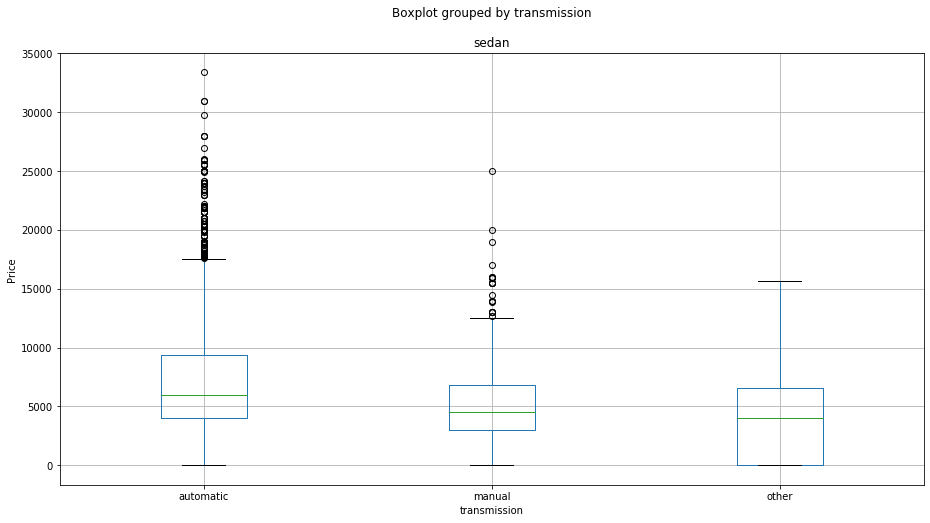

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


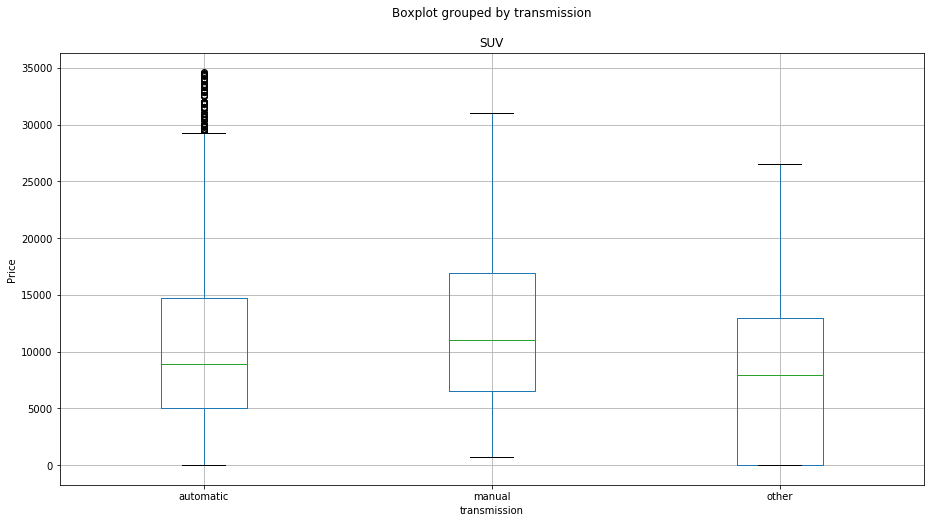

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


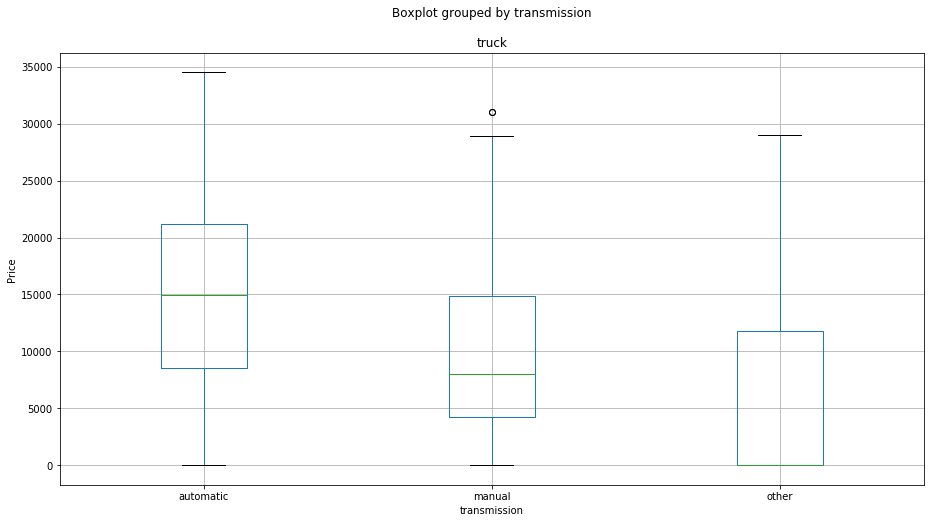

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


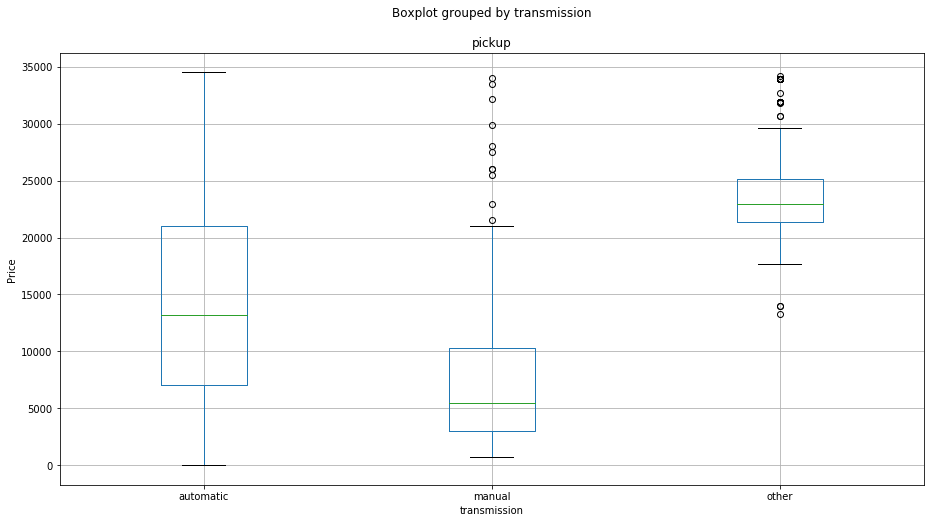

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


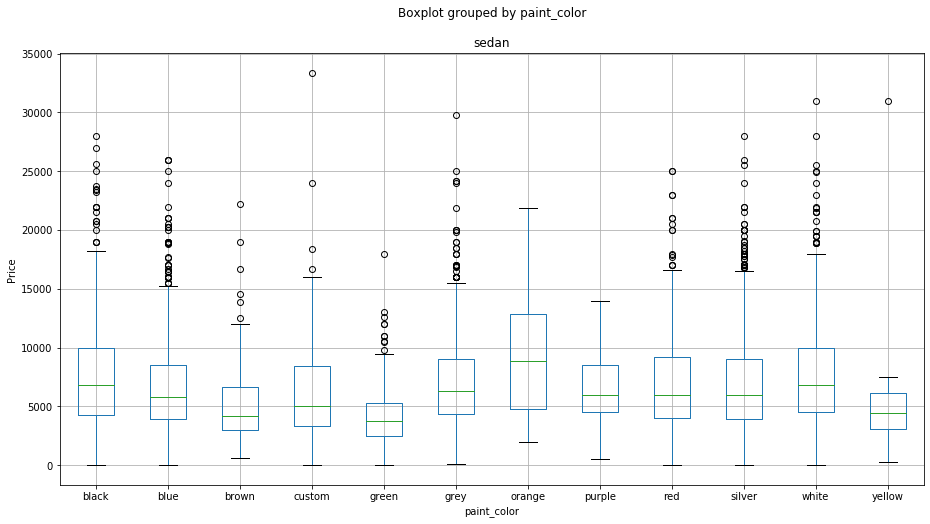

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


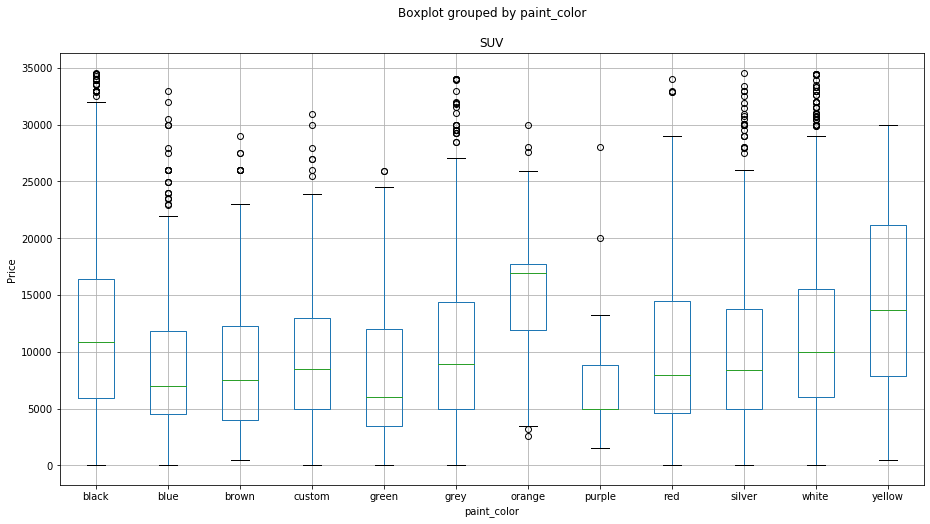

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


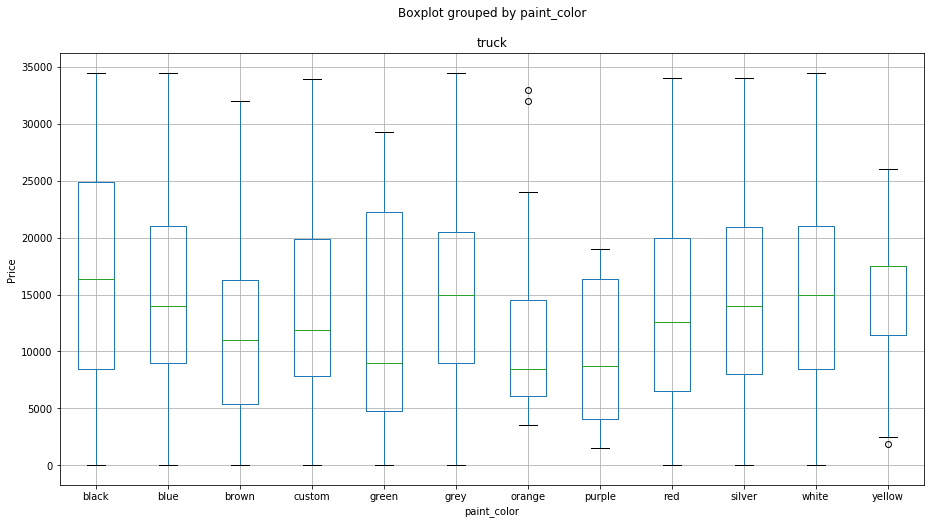

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


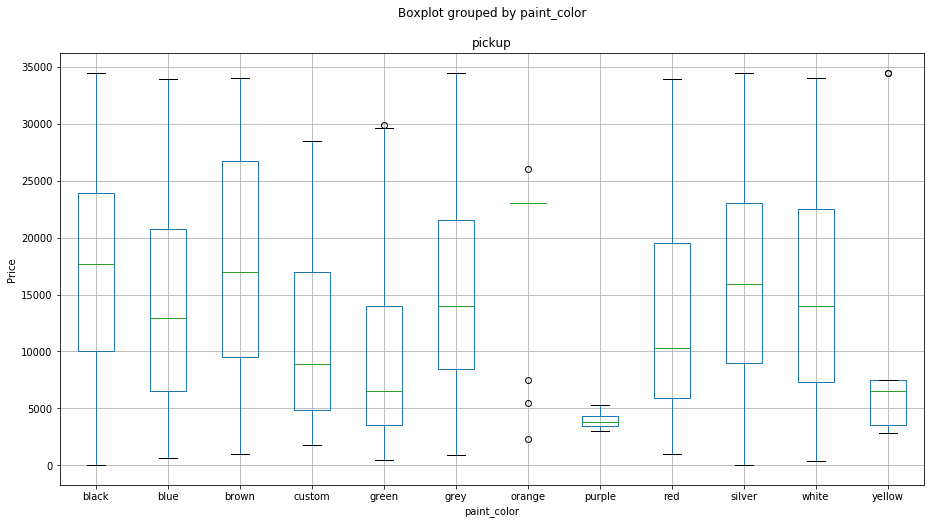

In [48]:
# boxplots for transmission and color, for each of the 4 main vehicle types (smaller dataset):  
for v in categ_var:
    for t in pop_types:
        no_outliers_no_missing_data.query('type == @t').boxplot('price', by=v, figsize=(15, 8))
        plt.title(t)
        plt.ylabel('Price')
        plt.show()

When we check the transmission impact on price in the smaller dataset - we see the same picture we saw in the fuller dataset (large impact for trucks and pickups, much less impact for sedans and SUVs).

When we check color impact on price in the smaller dataset - again we see very similar picture to the fuller dataset (see above). 



### Numerical variables (age, mileage, condition) 

For the numerical variables (age, mileage, and condition) we will first create scatterplots to check their correlation with price - for each of the 4 main vehicle type. For the mileage scatterplots we will use the 'yearly_mile' variable, since it is totally independant of the car age (while total mileage = 'odometer' is obviously usually dependant on car age. Later - in the correlation matrices - we will see odometer's correlation as well). Again we will start with the fuller dataset, and then check with the smaller datset. 

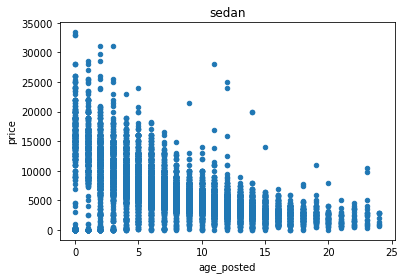

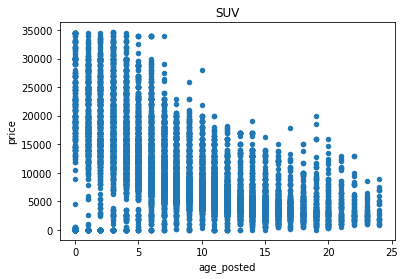

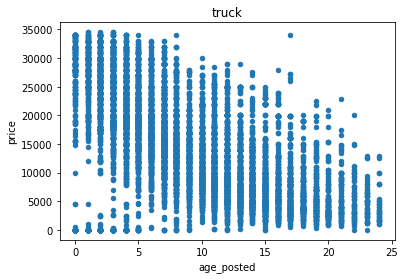

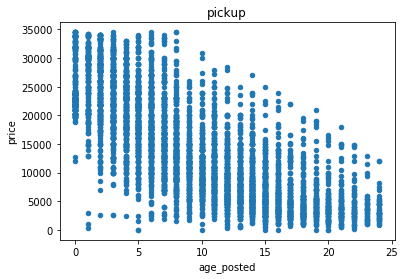

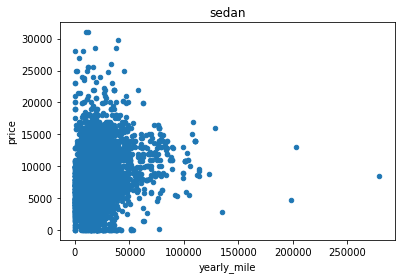

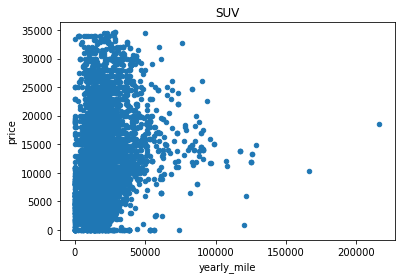

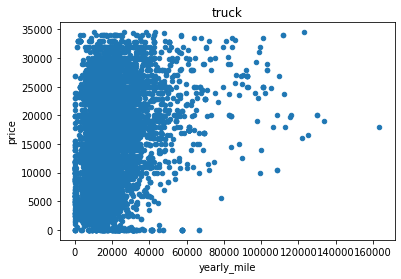

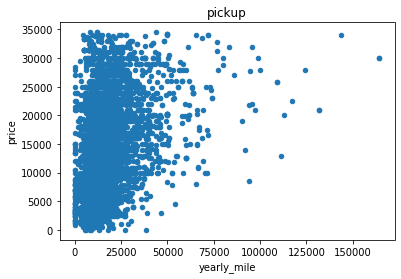

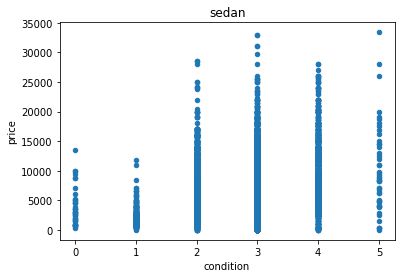

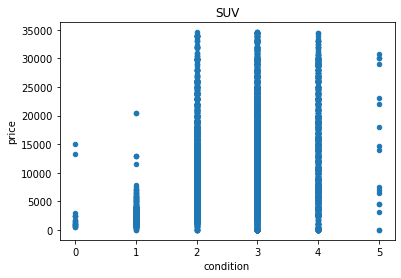

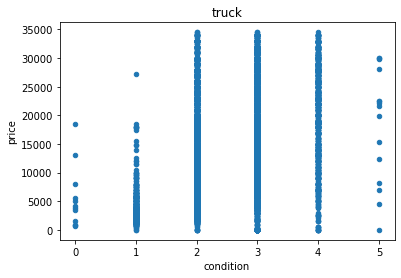

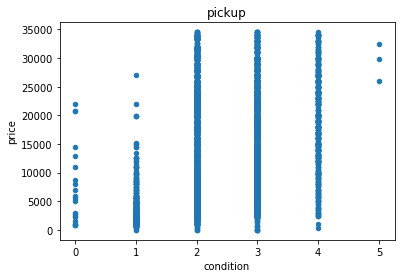

In [49]:
# Scatterplots for the three numerical variables, for each of the 4 main vehicle types: 
var = ['age_posted', 'yearly_mile', 'condition']
for v in var:
    for t in pop_types: 
        data_no_outliers.query('type == @t').plot(x=v, y='price', kind='scatter')
        plt.title(t) 

Observations:

**age**: 
- As can be expected, the older a car is - there are usually less cars of this age that have higher prices, and the younger it is - there are less cars of this age that have lower prices. For example: for sedan, a price over 15000 is usually for 7 or less years old cars. For SUV, a price over 25000 is usually for 6 or less years old cars. But it is important to note - as can be seen - that in the same time there are cars of young age - especially sedan and SUV - that are sold for lower prices as well. For newer trucks and pickups, differently, there are hardly any cars sold for the lower prices (example: almost all pickups that are 3 or less years old - show a price of more than 10000). We will later check the numeric linear correlation.

**yearly mileage**
- As can be seen (and maybe contrary to logical expectations), it is hard to note a clear correlation with price, in any of the vehicle types.

**condition**
- Not surprisingly, for each vehicle type most cars with higher prices have conditions 2-4 (good, excellent, like new. new - 5 - is rare in any case), and conditions 0-1 (salvage, fair) have low prices. But conditions 2-4 also show many cars in all types with low prices as well. This will probably come out also when we check later the numeric linear correlation. 

We will check now the above observations vs. the smaller dataset:

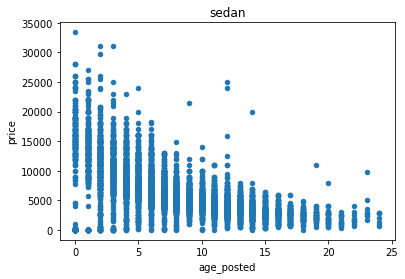

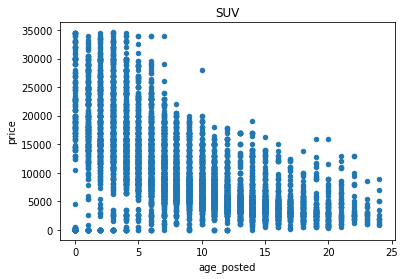

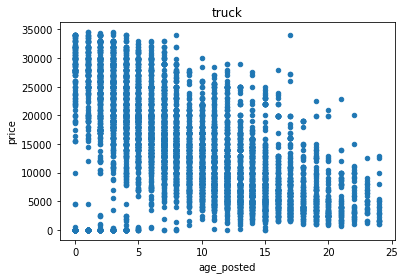

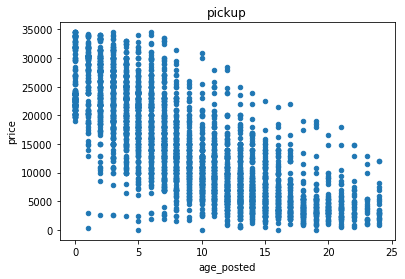

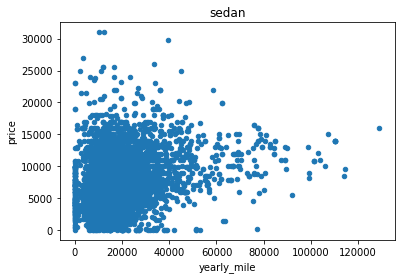

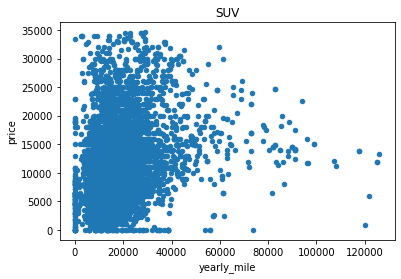

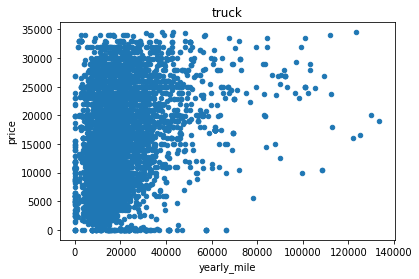

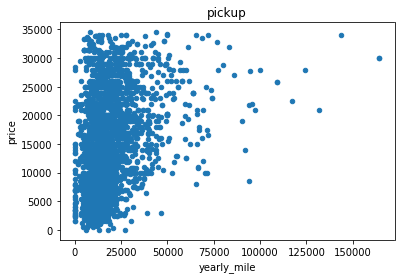

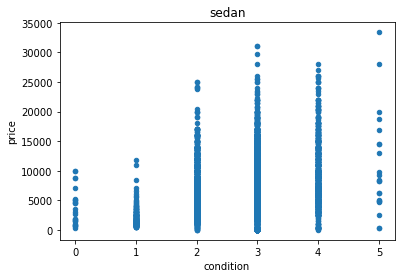

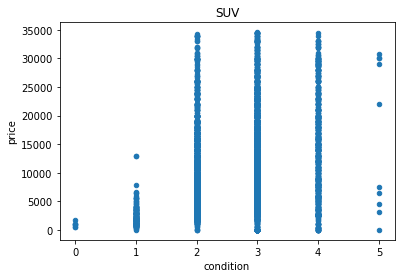

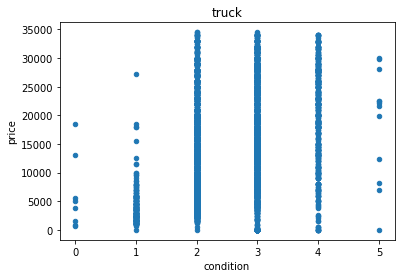

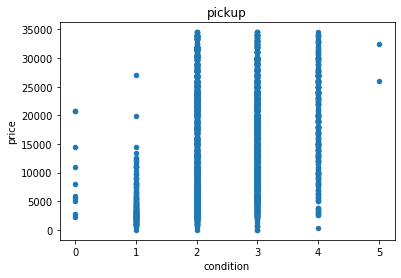

In [50]:
# Scatterplots for the three numerical variables, for each of the 4 main vehicle types (smaller dataset) 
for v in var:
    for t in pop_types: 
        no_outliers_no_missing_data.query('type == @t').plot(x=v, y='price', kind='scatter')
        plt.title(t) 

Once again, the picture in the smaller dataset (28197 ads) is very similar to the fuller dataset (49879 ads). 

Next - we will create correlation matrix for each vehicle type, to see if we find corr values above 0.5 (absolute value), which indicate linear correlation.

In [51]:
# sedan correlation matrix
data_no_outliers.query('type == "sedan"').corr()        

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age_posted,yearly_mile
price,1.000000,0.589746,0.298803,-0.039815,-0.557164,0.041721,0.001330,-0.639071,0.269584
model_year,0.589746,1.000000,0.304336,-0.153395,-0.563652,0.069372,-0.002216,-0.995137,0.469460
condition,0.298803,0.304336,1.000000,-0.048018,-0.330716,0.014887,-0.009587,-0.315158,0.062532
cylinders,-0.039815,-0.153395,-0.048018,1.000000,0.064536,0.228347,0.005293,0.129073,-0.074294
odometer,-0.557164,-0.563652,-0.330716,0.064536,1.000000,-0.056140,0.005697,0.608495,0.081590
is_4wd,0.041721,0.069372,0.014887,0.228347,-0.056140,1.000000,0.005267,-0.070339,0.009784
days_listed,0.001330,-0.002216,-0.009587,0.005293,0.005697,0.005267,1.000000,0.003758,-0.011159
age_posted,-0.639071,-0.995137,-0.315158,0.129073,0.608495,-0.070339,0.003758,1.000000,-0.497798
yearly_mile,0.269584,0.469460,0.062532,-0.074294,0.081590,0.009784,-0.011159,-0.497798,1.000000


In [57]:
data_no_outliers.query('type == "sedan"')[
    ['price', 'age_posted', 'odometer', 'condition', 'transmission', 'paint_color']]. corr()

,price,age_posted,odometer,condition
price,1.000000,-0.639071,-0.557164,0.298803
age_posted,-0.639071,1.000000,0.608495,-0.315158
odometer,-0.557164,0.608495,1.000000,-0.330716
condition,0.298803,-0.315158,-0.330716,1.000000


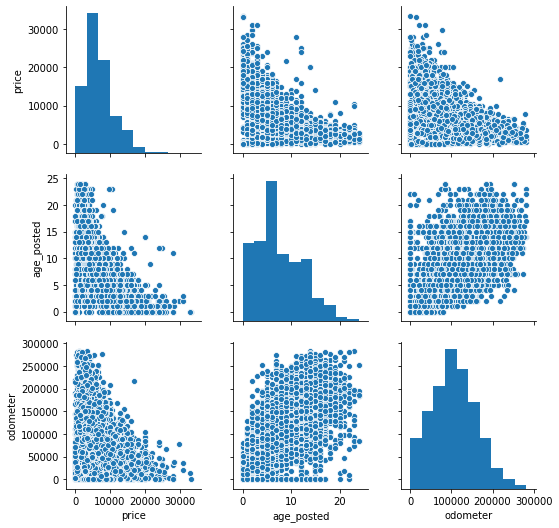

In [55]:
sns.pairplot(data_no_outliers.query('type == "sedan"')[
    ['price', 'age_posted', 'odometer']])

For sedan:

The fator that impacts the price the most is the vehicle's **age** (abs.corr ~.64). Naturally, the model year (corr ~.59) and odometer (abs.corr ~.56) are dependant on it. All other factors do not show significant linear correlation with the price.

Let's see if the picture is similar or different with the other three main vehicle types. 

In [75]:
# SUV correlation matrix
data_no_outliers.query('type == "SUV"').corr()      

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age_posted,yearly_mile
price,1.000000,0.571014,0.273043,-0.012825,-0.515890,0.108008,-0.021901,-0.603564,0.280588
model_year,0.571014,1.000000,0.332272,-0.232106,-0.606836,-0.056578,-0.014813,-0.996011,0.529174
condition,0.273043,0.332272,1.000000,-0.080828,-0.341087,-0.012584,-0.016188,-0.335485,0.074268
cylinders,-0.012825,-0.232106,-0.080828,1.000000,0.193593,0.131239,0.017783,0.239394,-0.124263
odometer,-0.515890,-0.606836,-0.341087,0.193593,1.000000,0.012004,0.015604,0.635079,0.007011
is_4wd,0.108008,-0.056578,-0.012584,0.131239,0.012004,1.000000,-0.004931,0.056767,-0.040769
days_listed,-0.021901,-0.014813,-0.016188,0.017783,0.015604,-0.004931,1.000000,0.016713,-0.016761
age_posted,-0.603564,-0.996011,-0.335485,0.239394,0.635079,0.056767,0.016713,1.000000,-0.550446
yearly_mile,0.280588,0.529174,0.074268,-0.124263,0.007011,-0.040769,-0.016761,-0.550446,1.000000


In [76]:
# truck correlation matrix
data_no_outliers.query('type == "truck"').corr()     

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age_posted,yearly_mile
price,1.000000,0.611064,0.294696,0.005353,-0.436686,0.270586,0.009817,-0.617959,0.318460
model_year,0.611064,1.000000,0.363048,-0.009997,-0.531997,0.177429,-0.012974,-0.996518,0.537536
condition,0.294696,0.363048,1.000000,-0.016695,-0.320150,0.113818,0.000987,-0.360852,0.090881
cylinders,0.005353,-0.009997,-0.016695,1.000000,0.002735,0.160882,0.003938,0.006900,0.003771
odometer,-0.436686,-0.531997,-0.320150,0.002735,1.000000,-0.079212,0.001470,0.574576,0.087494
is_4wd,0.270586,0.177429,0.113818,0.160882,-0.079212,1.000000,0.002543,-0.166224,0.093310
days_listed,0.009817,-0.012974,0.000987,0.003938,0.001470,0.002543,1.000000,0.011257,-0.010290
age_posted,-0.617959,-0.996518,-0.360852,0.006900,0.574576,-0.166224,0.011257,1.000000,-0.553225
yearly_mile,0.318460,0.537536,0.090881,0.003771,0.087494,0.093310,-0.010290,-0.553225,1.000000


In [77]:
# pickup correlation matrix
data_no_outliers.query('type == "pickup"').corr()     

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age_posted,yearly_mile
price,1.000000,0.734204,0.270719,-0.052327,-0.607241,0.351161,0.008231,-0.780366,0.340856
model_year,0.734204,1.000000,0.260239,-0.129291,-0.540648,0.224626,0.023554,-0.997062,0.500660
condition,0.270719,0.260239,1.000000,0.057348,-0.189551,0.043092,0.013680,-0.270558,0.141939
cylinders,-0.052327,-0.129291,0.057348,1.000000,0.134460,0.216085,0.005522,0.130819,-0.007563
odometer,-0.607241,-0.540648,-0.189551,0.134460,1.000000,-0.106613,0.004485,0.640086,0.071658
is_4wd,0.351161,0.224626,0.043092,0.216085,-0.106613,1.000000,-0.003119,-0.218789,0.126658
days_listed,0.008231,0.023554,0.013680,0.005522,0.004485,-0.003119,1.000000,-0.027180,0.025182
age_posted,-0.780366,-0.997062,-0.270558,0.130819,0.640086,-0.218789,-0.027180,1.000000,-0.511911
yearly_mile,0.340856,0.500660,0.141939,-0.007563,0.071658,0.126658,0.025182,-0.511911,1.000000


As we can see - there are some clear **differences** between the 4 vehicle types: 
- Pickup is the type were the correlation of vehicle age with price is the highest (abs.corr .78)
- Truck is the type were the correlation of odometer (total mileage) with price is the lowest (abs.corr ~.44)

But the **main conclusion is the same** for each of the main vehicle types:
- The numeric factor that impacts price the most is the vehicle's **age** (and after it - the variables that are dependant on it, fully or partly: model_year and odometer).

Before we move to summarize our conclusion, we will once more check the above observation with the smaller dataset (without any missing values). 

In [78]:
# sedan correlation matrix - small dataset:
no_outliers_no_missing_data.query('type == "sedan"').corr()        

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age_posted,yearly_mile
price,1.000000,0.647066,0.300100,-0.044253,-0.559211,0.037266,0.014100,-0.643524,0.294926
model_year,0.647066,1.000000,0.306454,-0.130328,-0.610251,0.077304,-0.002235,-0.995081,0.513150
condition,0.300100,0.306454,1.000000,-0.047218,-0.330838,0.018930,-0.009341,-0.305765,0.052480
cylinders,-0.044253,-0.130328,-0.047218,1.000000,0.072752,0.222410,-0.003119,0.130219,-0.074552
odometer,-0.559211,-0.610251,-0.330838,0.072752,1.000000,-0.070236,0.009855,0.607023,0.089051
is_4wd,0.037266,0.077304,0.018930,0.222410,-0.070236,1.000000,0.016292,-0.078524,0.018457
days_listed,0.014100,-0.002235,-0.009341,-0.003119,0.009855,0.016292,1.000000,0.003703,0.004961
age_posted,-0.643524,-0.995081,-0.305765,0.130219,0.607023,-0.078524,0.003703,1.000000,-0.526743
yearly_mile,0.294926,0.513150,0.052480,-0.074552,0.089051,0.018457,0.004961,-0.526743,1.000000


In [79]:
# SUV correlation matrix - small dataset:
no_outliers_no_missing_data.query('type == "SUV"').corr()        

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age_posted,yearly_mile
price,1.000000,0.614959,0.272608,-0.006863,-0.521513,0.115522,-0.033760,-0.613244,0.292249
model_year,0.614959,1.000000,0.326039,-0.285146,-0.622680,-0.069062,-0.027540,-0.995781,0.559882
condition,0.272608,0.326039,1.000000,-0.102577,-0.318471,-0.005675,-0.023186,-0.324884,0.067248
cylinders,-0.006863,-0.285146,-0.102577,1.000000,0.241694,0.118080,0.022142,0.284511,-0.150311
odometer,-0.521513,-0.622680,-0.318471,0.241694,1.000000,0.034404,0.023127,0.620260,0.009716
is_4wd,0.115522,-0.069062,-0.005675,0.118080,0.034404,1.000000,0.004948,0.068962,-0.032445
days_listed,-0.033760,-0.027540,-0.023186,0.022142,0.023127,0.004948,1.000000,0.026791,-0.014698
age_posted,-0.613244,-0.995781,-0.324884,0.284511,0.620260,0.068962,0.026791,1.000000,-0.569375
yearly_mile,0.292249,0.559882,0.067248,-0.150311,0.009716,-0.032445,-0.014698,-0.569375,1.000000


In [80]:
# truck correlation matrix - small dataset:
no_outliers_no_missing_data.query('type == "truck"').corr()     

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age_posted,yearly_mile
price,1.000000,0.608214,0.280802,0.002501,-0.432972,0.277502,0.014853,-0.606143,0.314714
model_year,0.608214,1.000000,0.324387,-0.005714,-0.529894,0.134510,-0.003015,-0.996322,0.568143
condition,0.280802,0.324387,1.000000,-0.021499,-0.287806,0.105469,0.013102,-0.322797,0.081976
cylinders,0.002501,-0.005714,-0.021499,1.000000,-0.004433,0.166115,0.009185,0.005882,0.006978
odometer,-0.432972,-0.529894,-0.287806,-0.004433,1.000000,-0.042514,0.006032,0.528626,0.116157
is_4wd,0.277502,0.134510,0.105469,0.166115,-0.042514,1.000000,0.014438,-0.133636,0.081048
days_listed,0.014853,-0.003015,0.013102,0.009185,0.006032,0.014438,1.000000,0.003080,-0.004576
age_posted,-0.606143,-0.996322,-0.322797,0.005882,0.528626,-0.133636,0.003080,1.000000,-0.578094
yearly_mile,0.314714,0.568143,0.081976,0.006978,0.116157,0.081048,-0.004576,-0.578094,1.000000


In [81]:
# pickup correlation matrix - small dataset:
no_outliers_no_missing_data.query('type == "pickup"').corr()     

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age_posted,yearly_mile
price,1.000000,0.785019,0.241686,-0.047169,-0.618189,0.345042,0.017734,-0.783200,0.343434
model_year,0.785019,1.000000,0.208745,-0.152533,-0.620902,0.178868,0.034990,-0.996901,0.518900
condition,0.241686,0.208745,1.000000,0.065140,-0.139262,0.022038,0.006937,-0.208220,0.137608
cylinders,-0.047169,-0.152533,0.065140,1.000000,0.172380,0.207536,-0.000679,0.152921,-0.014396
odometer,-0.618189,-0.620902,-0.139262,0.172380,1.000000,-0.074403,-0.001210,0.619912,0.084060
is_4wd,0.345042,0.178868,0.022038,0.207536,-0.074403,1.000000,0.003096,-0.181175,0.107935
days_listed,0.017734,0.034990,0.006937,-0.000679,-0.001210,0.003096,1.000000,-0.031281,0.023975
age_posted,-0.783200,-0.996901,-0.208220,0.152921,0.619912,-0.181175,-0.031281,1.000000,-0.527344
yearly_mile,0.343434,0.518900,0.137608,-0.014396,0.084060,0.107935,0.023975,-0.527344,1.000000


Once again - the big picture is the same: in each vehicle type, the age of the car is the most impactful numeric factor on the price. (interestingly, the smaller dataset has the model_year correlated with the price even more than the fuller dataset, probably because of the rows with the missing model_year values that were dropped). 

### Numerical variables with inear correlation with Price (age, mileage) 

Following the above exploration, we will now present a short version of only the main numeric factors that correlate linearly with price - age and mileage. We will present the focused correlation matrices and plots for each vehicle type, this time only for the fuller dataset (since, as we saw, the results with the smaller dataset were very similar to those with the fuller dataset). 

#### Correlation matrices - per vehicle type

In [58]:
# correlation matrix for sedan:
data_no_outliers.query('type == "sedan"')[
    ['price', 'age_posted', 'odometer']]. corr()

,price,age_posted,odometer
price,1.000000,-0.639071,-0.557164
age_posted,-0.639071,1.000000,0.608495
odometer,-0.557164,0.608495,1.000000


In [59]:
# correlation matrix for SUV:
data_no_outliers.query('type == "SUV"')[
    ['price', 'age_posted', 'odometer']]. corr()

,price,age_posted,odometer
price,1.000000,-0.603564,-0.515890
age_posted,-0.603564,1.000000,0.635079
odometer,-0.515890,0.635079,1.000000


In [60]:
# correlation matrix for truck:
data_no_outliers.query('type == "truck"')[
    ['price', 'age_posted', 'odometer']]. corr()

,price,age_posted,odometer
price,1.000000,-0.617959,-0.436686
age_posted,-0.617959,1.000000,0.574576
odometer,-0.436686,0.574576,1.000000


In [61]:
# correlation matrix for pickup: 
data_no_outliers.query('type == "pickup"')[
    ['price', 'age_posted', 'odometer']]. corr()

,price,age_posted,odometer
price,1.000000,-0.780366,-0.607241
age_posted,-0.780366,1.000000,0.640086
odometer,-0.607241,0.640086,1.000000


The linear correlation is not very strong (as we will see again below in the plots) but still it exixts - Pearson correlation coefficient absolute value above 0.5, as explained above and below in the general conclusions.  

#### Correlation plots - per vehicle type

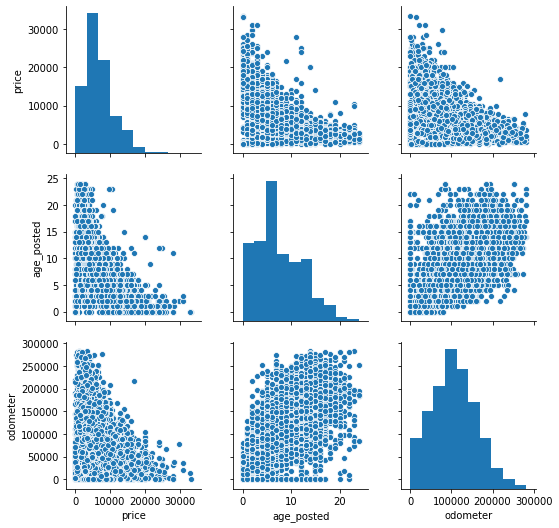

In [62]:
# correlation plots for sedan:
sns.pairplot(data_no_outliers.query('type == "sedan"')[
    ['price', 'age_posted', 'odometer']])

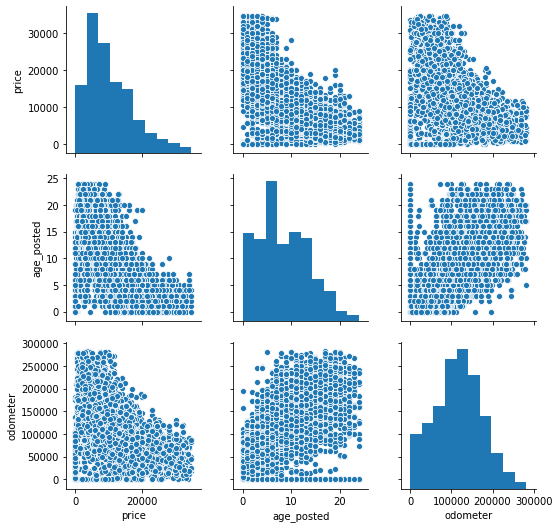

In [63]:
# correlation plots for SUV:
sns.pairplot(data_no_outliers.query('type == "SUV"')[
    ['price', 'age_posted', 'odometer']])

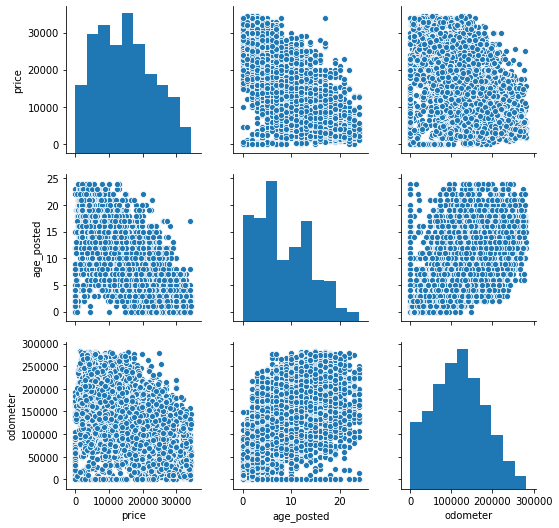

In [64]:
# correlation plots for truck:
sns.pairplot(data_no_outliers.query('type == "truck"')[
    ['price', 'age_posted', 'odometer']])

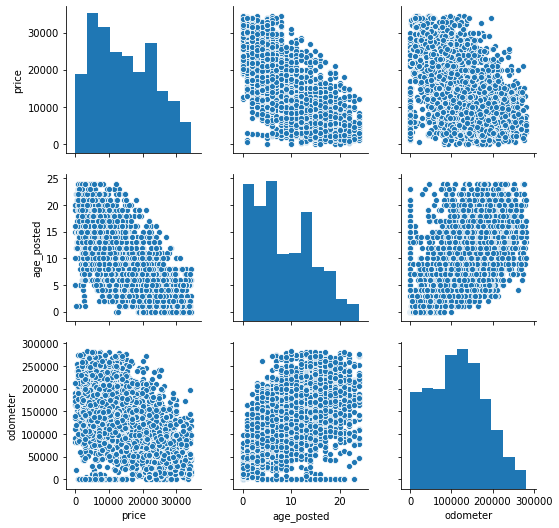

In [65]:
# correlation plots for pickup:
sns.pairplot(data_no_outliers.query('type == "pickup"')[
    ['price', 'age_posted', 'odometer']])

As we can see - the linear correlation is not always that strong - but the combination of the plots with the Pearson correlation coefficient (above 0.5) shows a linear correlation exists between vehicle age and mileage on one hand and the price on the other hand. 
We will move now to summerize the general conclusions. 

## General conclusion

1. **The project goal** is to determine which factors influence the price of a vehicle.
2. **The original dataset** includes 8 columns (including price) with full 51525 rows, 4 columns with 40K-50K rows (missing a few K rows), and one column (is_4wd) with only half of the rows.
3. **Preprocessing**:
    3.1. The column with half the rows was filled in with 'False' value (since it was discovered that the missing values were actually 'False')
    3.2. Datatypes were changed into bool and datetime when needed
    3.3. Data Enrichment: vehicle age, and yearly mile, were added.
    3.4. For the rest of the missing values - for reliability reasons it was decided to analyze two datasets: the full one (with missing values in some columns, in order not to lose real independant data), and a smaller one without any missing values. 
4. High **outliers** were identified in 3 of the core parameters (price, age, and mileage). They were dropped using the IQR method for determinning limit. 
5. **Two clean final datasets** were established: The full one without outliers (49879 ads), and a smaller one without outliers and without any missing values (28197 ads). The rest of the analysis was done on both datasets, with very similar results that validate each other.
6. **Ads lifetime**: The IQR of the ads lifetime is between 19 and 53 days, the mean is ~40 days, and the median is 33 days. Only a very small portion of the ads are posted for more than 100 days, and on the other hand there are quite a few hundreds of ads that are posted for only a few days or less. ads that were removed very fast usually had: Price up to 15000 (0 days posted), Model year after 2000, and Yearly mileage up to 20000 (0 days posted).   
7. **Average price per each type of vehicle**: The typical price is significantly different for different types of vehicles. For the 4 types that have the highest numbers of ads (and make together ~85% of all ads), the median prices are (in the fuller dataset. Very similar in the smaller dataset): 
    - sedan: 5995
    - SUV: 8500
    - truck: 14000
    - pickup:13500
    
Analysis for additional factors that impact price was done separately for each vehicle type.     
    
8. **Transmission type** impacts price especially when it comes to trucks and pickups (but far less for sedan or SUV):
    - For trucks: manual transmission's median price (7500) is only half(!) of the median price of automatic (15000) 
    - For pickups: manual transmission's median price (5000) is only ~40%(!) of the median price of automatic (12500. 'other' value for pickup transmission is much more expensive, but it is unclear what it uncludes).
    
    
9. **Color** impacts price:
    - For sedans: black, white, silver and grey are all somewhat more expensive, green and brown show the lower prices, and blue is in between.
    - For SUVs: orange leads with a much higher price (very small group, but still 81 ads), and of the large groups black and following white show the higher prices, while blue, green, red, silver and grey show somewhat lower prices.
    - For trucks: black, and then grey and white show the higher prices while green shows the lowest prices.
    - For pickups: black leads higher prices, followed by brown and silver. White is a bit lower and green shows again lowest prices.
    

10. **Numerical variables' linear correlation with Price**: 
- there are some clear differences between the 4 vehicle types: 
    - Pickup is the type were the correlation of vehicle age with price is the highest (abs.corr .78)
    - Truck is the type were the correlation of odometer (total mileage) with price is the lowest (abs.corr ~.44)
- But the **main conclusion is the same** for each of the main vehicle types:
    - The numeric factor that impacts price the most is the vehicle's **age** (and after it - the variables that are dependant on it, fully or partly: model_year and **odometer**).
    
11. **Overall Conclusion**: The factors that influence the price of a vehicle are:
    - Type of the vehicle
    - Age of the vehicle
    - Color 
    - Transmission type (for trucks and pickups)
    - Total mileage (usually dependant on vehicle's age)
    - Condition (for salvage and fair conditions) 